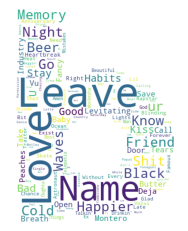

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import numpy as np
from PIL import Image

col = ['Title']
find = pd.read_csv('Billboard_Hot_100.csv', usecols=col)
join = ' '.join(find['Title'])
bill = np.array(Image.open( "billboard.jpg")) 
wordcloud = WordCloud( background_color ='white', mask = bill).generate(join)
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


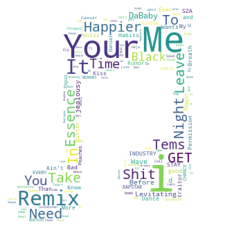

In [2]:
col2 = ['Song']
stop_words = ["feat", "the","lil" ,"Baby", "Durk", "e"]
find2 = pd.read_csv('Apple_Music_Global_Top_100.csv', usecols=col2)
join2 = ' '.join(find2['Song'])
apple = np.array(Image.open( "apple.jpg")) 
wordcloud = WordCloud(background_color ='white', mask = apple, stopwords = stop_words).generate(join2)
# Generate plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [3]:
df_bill = pd.read_csv("Billboard_Hot_100.csv")
df_bill = df_bill.loc[:, ~df_bill.columns.str.contains('^Unnamed')]
df_bill

,Title,Artist,Current Position,Last Week Position,Peak Position,Weeks On Chart,New to Chart?
0,Stay,The Kid LAROI & Justin Bieber,1,1,1,5,False
1,Good 4 U,Olivia Rodrigo,2,2,1,13,False
2,Bad Habits,Ed Sheeran,3,5,3,7,False
3,Kiss Me More,Doja Cat Featuring SZA,4,6,3,18,False
4,Levitating,Dua Lipa Featuring DaBaby,5,3,2,45,False
...,...,...,...,...,...,...,...
95,Next Girl,Carly Pearce,96,0,86,3,False
96,Happier,Olivia Rodrigo,97,93,15,12,False
97,Twerkulator,City Girls,98,0,51,9,False
98,Fiel,"Los Legendarios, Wisin & Jhay Cortez",99,97,62,9,False


<AxesSubplot:title={'center':'Billboard: Number of Songs on Chart'}>

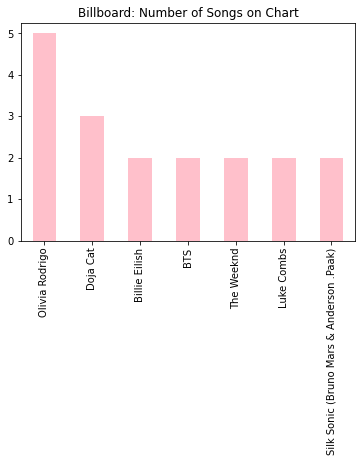

In [20]:
topArtists_bill = df_bill['Artist'].value_counts()[0:7]
#topArtists_bill
topArtists_bill.plot.bar(color = "pink", title="Billboard: Number of Songs on Chart",  )


In [5]:
df_apple = df_apple = pd.read_csv("Apple_Music_Global_Top_100.csv")
df_apple = df_apple.loc[:, ~df_apple.columns.str.contains('^Unnamed')]
df_apple

,Song,Artist,Time
0,STAY,The Kid LAROI & Justin Bieber,2:21
1,INDUSTRY BABY,Lil Nas X & Jack Harlow,3:32
2,Bad Habits,Ed Sheeran,3:51
3,Happier Than Ever,Billie Eilish,4:58
4,good 4 u,Olivia Rodrigo,2:58
...,...,...,...
95,Hellcats & Trackhawks,Only The Family & Lil Durk,2:26
96,"jealousy, jealousy",Olivia Rodrigo,2:53
97,m y . l i f e,"J. Cole, 21 Savage, & Morray",3:38
98,AM Remix,"Nio García, J Balvin, & Bad Bunny",4:21


<AxesSubplot:title={'center':'Apple: Number of Songs on Chart'}>

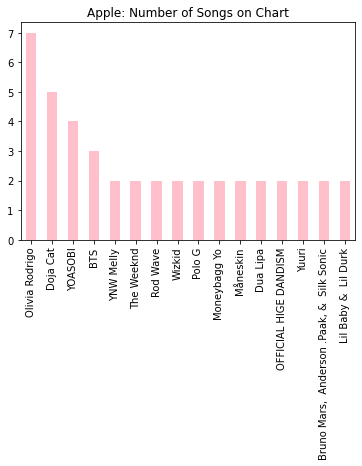

In [23]:
topArtists_apple = df_apple['Artist'].value_counts()[0:16]
#topArtists_apple
topArtists_apple.plot.bar(color = "pink", title="Apple: Number of Songs on Chart" )


Billboard has more variety of artists. 

In [7]:
print(df_apple.dtypes)
df_apple2 =df_apple
df_apple2["Time"]=df_apple2["Time"].str.replace(':','.')
df_apple2.head(5)

Song      object
Artist    object
Time      object
dtype: object


,Song,Artist,Time
0,STAY,The Kid LAROI & Justin Bieber,2.21
1,INDUSTRY BABY,Lil Nas X & Jack Harlow,3.32
2,Bad Habits,Ed Sheeran,3.51
3,Happier Than Ever,Billie Eilish,4.58
4,good 4 u,Olivia Rodrigo,2.58


In [8]:
df_apple2["Time"] = df_apple2["Time"].astype(str).astype(float)
print(df_apple2.dtypes)

Song       object
Artist     object
Time      float64
dtype: object


In [9]:
print("Avg song Time: ",float(np.round(df_apple2["Time"].mean(),2)), "secs")

Avg song Time:  3.15 secs


In [10]:
print("Median song Time: ",float(np.round(df_apple2["Time"].median(),2)),"secs")

Median song Time:  3.18 secs


Symmetrical distribution.

In [11]:
df_bill2 = df_bill.groupby('Title')['Weeks On Chart'].mean()

In [12]:
#df_bill2.dtypes
df_bill3 =df_bill2.sort_values(ascending=False)
df_bill3

Title
Blinding Lights                      88
My Ex's Best Friend                  52
Levitating                           45
Forever After All                    42
Without You                          36
                                     ..
Buy Dirt                              1
Repeat It                             1
Take My Breath                        1
i hope ur miserable until ur dead     1
Lose                                  1
Name: Weeks On Chart, Length: 100, dtype: int64

<AxesSubplot:title={'center':'Number of Weeks on Chart'}, xlabel='Title'>

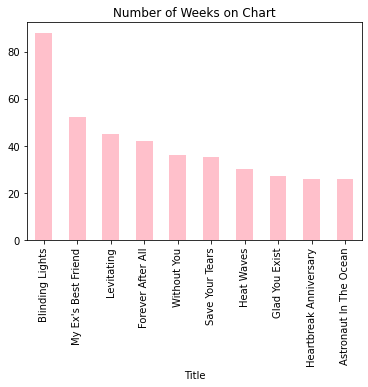

In [25]:
df_bill3.head(10).plot(kind = 'bar', color=['pink'], title="Number of Weeks on Chart" )

In [14]:
df_bill4 = df_bill['Title'].where(df_bill['Peak Position'] ==1)
df_bill4.head(5)

0        Stay
1    Good 4 U
2         NaN
3         NaN
4         NaN
Name: Title, dtype: object

In [15]:
df_bill4.dropna()

0                               Stay
1                           Good 4 U
6                             Butter
8     Montero (Call Me By Your Name)
10                   Save Your Tears
11                           Peaches
13               Leave The Door Open
17                   Blinding Lights
24                           Rapstar
54               Permission To Dance
Name: Title, dtype: object

All the songs that peaked at #1 on the chart. 